# Updated PeakIdentify - Example and Functionality

***

This notebook walks you through the usage and functionality of the updated peakidentify function. First, the functionality will be shown by just calling the wrapper function, but subsequent examples will explore the sub-functions and explain their usage. 

This function was created by the Raman Noodles Dev Team, and we hope you find it to your liking. Feel free to leave issues for suggested improvments. 

### Example 0.A: Data Input

First, we'll generate the dataset that we will use to explore this functionality. This data will be downloaded from _____

. In order to generate an "unknown spectrum" that we will be attempting to fit, ____________, and feed that in as our unknown dataset. For further explanation of the dataprep or spectrafit packages, refer to the Jupyter notebooks which present examples of their usage, also found in this repo.

In [1]:
import h5py
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
from ramannoodles import spectrafit
from ramannoodles import peakidentify
from ramannoodles import dataprep

We will use a pair of known spectra from our calibration list and put it in hdf5 format with the dataprep module. See dataprep example for more details. The functions new_hdf5 and add_calibration should only be called once or else an File Already exists error will be raised

In [21]:
# dataprep.new_hdf5('dataprep_calibration_test')


In [22]:
dataprep.view_hdf5('dataprep_calibration_test.hdf5')

**** dataprep_calibration_test.hdf5 ****


In [24]:
# dataprep.add_calibration('dataprep_calibration_test.hdf5',
#                           '../ramannoodles/tests/test_files/Hydrogen_Baseline_Calibration.xlsx',
#                           label='Hydrogen')

In [25]:
# dataprep.add_calibration('dataprep_calibration_test.hdf5',
#                           '../ramannoodles/tests/test_files/Methane_Baseline_Calibration.xlsx',
#                           label='Methane')

In [27]:
dataprep.view_hdf5('dataprep_calibration_test.hdf5')

**** dataprep_calibration_test.hdf5 ****
Hydrogen
|    Peak_1
|    Peak_2
|    Peak_3
|    Peak_4
|    counts
|    wavenumber
Methane
|    Peak_1
|    counts
|    wavenumber


In [29]:
test_example = h5py.File('dataprep_calibration_test.hdf5', 'r')
list(test_example.keys())

['Hydrogen', 'Methane']

In [30]:
list(test_example.values())

[<HDF5 group "/Hydrogen" (6 members)>, <HDF5 group "/Methane" (3 members)>]

In [31]:
type(test_example)

h5py._hl.files.File

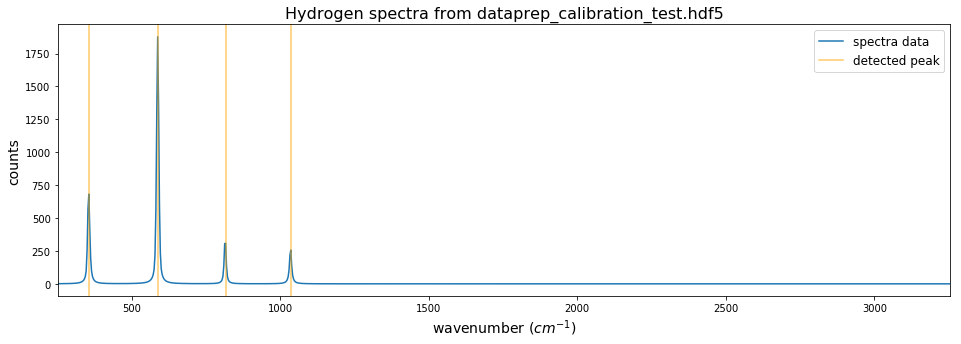

In [32]:
# plotted known spectra with detected peaks
dataprep.plot_fit('dataprep_calibration_test.hdf5', 'Hydrogen')

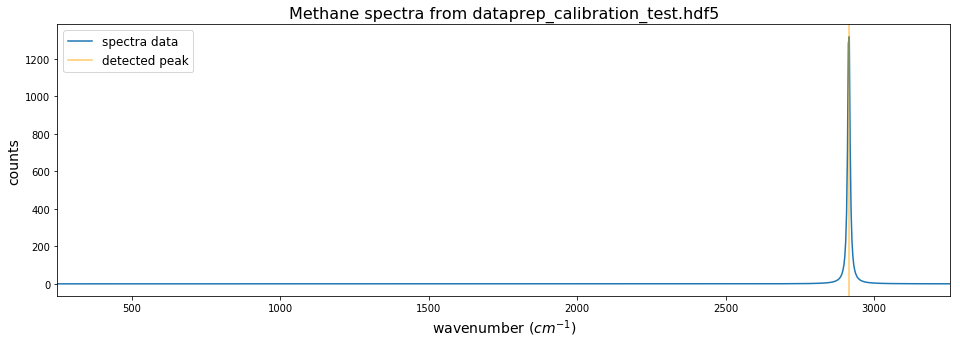

In [33]:
dataprep.plot_fit('dataprep_calibration_test.hdf5', 'Methane')

In [38]:
# dataprep.new_hdf5('dataprep_experiment_test')
# dataprep.add_experiment('dataprep_experiment_test.hdf5', '../ramannoodles/tests/test_files/FA_3.6wt__300C_25s.csv') 

In [39]:
dataprep.view_hdf5('dataprep_experiment_test.hdf5')

**** dataprep_experiment_test.hdf5 ****
300C
|    25s
|    |    Peak_01
|    |    Peak_02
|    |    Peak_03
|    |    Peak_04
|    |    Peak_05
|    |    Peak_06
|    |    Peak_07
|    |    Peak_08
|    |    Peak_09
|    |    Peak_10
|    |    Peak_11
|    |    Peak_12
|    |    Peak_13
|    |    Peak_14
|    |    Peak_15
|    |    Peak_16
|    |    counts
|    |    wavenumber


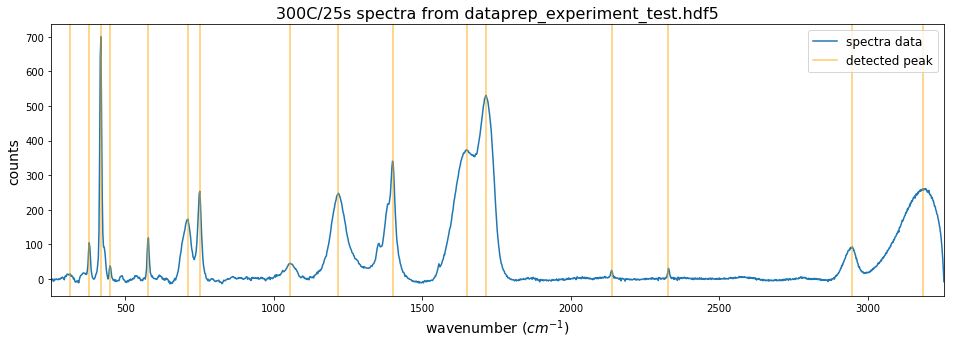

In [40]:
dataprep.plot_fit('dataprep_experiment_test.hdf5', '300C/25s')

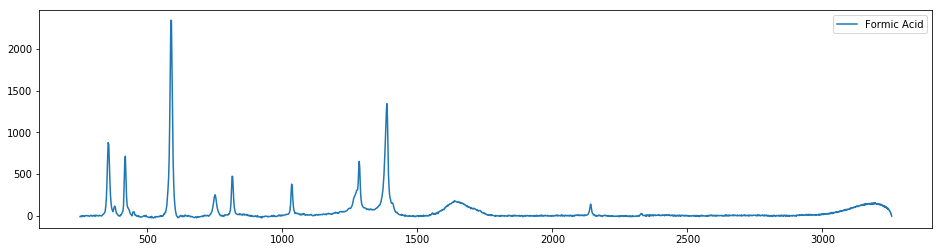

In [4]:
# Next we will open an unknown spectra from our experiments 
FA_data = pd.read_excel('../development/FormicAcid_3percentconc_400C_5s_00000.xlsx',
                        header=None, names=('x', 'y'))
plt.figure(figsize=(16,4))
plt.plot(FA_data['x'], FA_data['y'], label='Formic Acid')
plt.legend()
unknown_xFA = FA_data['x']
unknown_yFA = FA_data['y']

### Example 0.B: Test Driven Development



In [ ]:
"""
Module used to unit test the functionality and outputs of the peakidentify.py module
"""
# IMPORTING MODULES
import os
import h5py
from ramannoodles import dataprep
import numpy as np
from ramannoodles import peakidentify
from ramannoodles import shoyu
from ramannoodles import spectrafit

def test_peak_assignment():
    """This function tests the operation of the peak_assignment function in peakidentify.py"""
    #First, generate a testing dataset.
    shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
    compound_1 = shoyu_data_dict['WATER']
    compound_2 = shoyu_data_dict['CARBON MONOXIDE']
    compound_3 = shoyu_data_dict['CARBON DIOXIDE']
    unknown_x, unknown_y = shoyu.combine_spectra(compound_1, compound_2, plot=False)
    unknown_x = np.asarray(unknown_x)
    unknown_y = np.asarray(unknown_y)
    known_compound_list = [compound_1, compound_2, compound_3]
    precision = 0.03

    #Various try statements to make sure that bad inputs are handled correctly.
    try:
        peakidentify.peak_assignment(1, unknown_y, known_compound_list, precision, False)
    except TypeError:
        print("An invalid unknown_x was passed to the function, and it was"
              " handled well with a TypeError.")

    try:
        peakidentify.peak_assignment(unknown_x, 2, known_compound_list, precision, False)
    except TypeError:
        print("An invalid unknown_y was passed to the function, and it was "
              "handled well with a TypeError.")

    try:
        peakidentify.peak_assignment(unknown_x, unknown_y, 'string', precision, False)
    except TypeError:
        print("An invalid known_compound_list was passed to the function, "
              "and it was handled well with a TypeError.")

    try:
        peakidentify.peak_assignment(unknown_x, unknown_y, [1, 3, 6], precision, False)
    except TypeError:
        print("An invalid element inside known_compound_list was passed to "
              "the function, and it was handled well with a TypeError.")

    try:
        peakidentify.peak_assignment(unknown_x, unknown_y, known_compound_list, 'precision', False)
    except TypeError:
        print("An invalid precision value was passed to the function, and "
              "it was handled well with a TypeError.")

    try:
        peakidentify.peak_assignment(1, unknown_y, known_compound_list, precision, 'False')
    except TypeError:
        print("An invalid plot value was passed to the function, and it "
              "was handled well with a TypeError.")

def test_compare_unknown_to_known():
    """This function tests the operation of the compare_unknown_to_known
    function in peakidentify.py"""
    #Build our test dataset.
    shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
    compound_1 = shoyu_data_dict['WATER']
    compound_2 = shoyu_data_dict['CARBON MONOXIDE']
    compound_3 = shoyu_data_dict['CARBON DIOXIDE']
    unknown_x, unknown_y = shoyu.combine_spectra(compound_1, compound_2, plot=False)
    unknown_x = np.asarray(unknown_x)
    unknown_y = np.asarray(unknown_y)
    known_compound_list = [compound_1, compound_2, compound_3]
    precision = 0.03
    known_peaks = []
    for i, _ in enumerate(known_compound_list):
        known_peaks.append(spectrafit.compound_report(known_compound_list[i])[0])
    unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]

    try:
        peakidentify.compare_unknown_to_known(1, known_peaks[0], precision)
    except TypeError:
        print("An invalid unknown_peaks value was passed to the function, "
              "and was handled correctly.")

    try:
        peakidentify.compare_unknown_to_known(unknown_peaks, 'known_peaks', precision)
    except TypeError:
        print("An invalid known_peaks value was passed to the function, "
              "and was handled correctly.")

    try:
        peakidentify.compare_unknown_to_known(unknown_peaks, known_peaks[0], 'precision')
    except TypeError:
        print("An invalid precision value was passed to the function, and "
              "was handled correctly.")

    #After testing for resilience to unexpected inputs, now ensure outputs are performing correctly

    #First, make sure function is returning the list.
    assert isinstance(peakidentify.compare_unknown_to_known(
        unknown_peaks, known_peaks[0], precision), np.ndarray), (""
                                                                 "Function is not returning list")

    #Compare one set of peaks to itself. The full association matrix should have all values = 1.
    self_comp = np.mean(peakidentify.compare_unknown_to_known(known_peaks[0],
                                                              known_peaks[0], precision))
    assert self_comp == 1, ("Peak Assignment Error. Comparison of compound "
                            "against itself should find all peaks.")

    dif_comp = np.mean(peakidentify.compare_unknown_to_known([1, 3, 6],
                                                             [1000, 2000, 5000], precision))
    assert dif_comp == 0, ("Peak Assignment Error. Passed values should "
                           "have no matching assignments.")

def test_peak_position_comparisons():
    """This function tests the operation of the peak_position_comparisons
    function in peakidentify. Said function returns a list of strings that
    contain text assignments of each peak in the unknown spectrum."""

    #First, generate good data.
    shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
    compound_1 = shoyu_data_dict['WATER']
    compound_2 = shoyu_data_dict['CARBON MONOXIDE']
    compound_3 = shoyu_data_dict['CARBON DIOXIDE']
    unknown_x, unknown_y = shoyu.combine_spectra(compound_1, compound_2, plot=False)
    unknown_x = np.asarray(unknown_x)
    unknown_y = np.asarray(unknown_y)
    known_compound_list = [compound_1, compound_2, compound_3]
    unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]
    known_peaks = []
    association_matrix = []
    for i, _ in enumerate(known_compound_list):
        known_peaks.append(spectrafit.compound_report(known_compound_list[i])[0])
        association_matrix.append(peakidentify.compare_unknown_to_known(
            unknown_peaks, known_peaks[i], 0.03))

    #Then, test error handling of bad inputs for the function.
    try:
        peakidentify.peak_position_comparisons(1, known_peaks,
                                               known_compound_list,
                                               association_matrix)
    except TypeError:
        print("An invalid unknown_peaks value was passed to the function, "
              "and was handled correctly.")

    try:
        peakidentify.peak_position_comparisons(unknown_peaks,
                                               'known_peaks',
                                               known_compound_list,
                                               association_matrix)
    except TypeError:
        print("An invalid known_peaks value was passed to the function, "
              "and was handled correctly.")

    try:
        peakidentify.peak_position_comparisons(unknown_peaks,
                                               known_peaks,
                                               'known_compound_list',
                                               association_matrix)
    except TypeError:
        print("An invalid known_compound_list value was passed to the function,"
              "and was handled correctly.")

    try:
        peakidentify.peak_position_comparisons(unknown_peaks,
                                               known_peaks,
                                               known_compound_list,
                                               'association_matrix')
    except TypeError:
        print("An invalid association_matrix value was passed to the function,"
              "and was handled correctly.")

    #Check to make sure the function is returning a list.
    assert isinstance(peakidentify.peak_position_comparisons(
        unknown_peaks, known_peaks, known_compound_list,
        association_matrix), list), "The function is not returning a list."

    #Test a call that says that no peaks have associations
    association_matrix_0 = []
    association_matrix_0.append(peakidentify.compare_unknown_to_known(known_peaks[0],
                                                                      known_peaks[1],
                                                                      0.03))
    zero_output = peakidentify.peak_position_comparisons(known_peaks[0],
                                                         [known_peaks[1]],
                                                         [compound_1],
                                                         association_matrix_0)[0]
    assert zero_output[0] == 'Unassigned', """The function is not properly
    handling unassigned peaks."""

    #Test the function to make sure that it has the right functionality
    association_matrix = []
    #Generate a matrix with all associations equal to 1
    association_matrix.append(peakidentify.compare_unknown_to_known(known_peaks[0],
                                                                    known_peaks[0],
                                                                    0.03))
    #change the middle index to 0
    association_matrix[0][1] = 0
    test_peak_labels = peakidentify.peak_position_comparisons(known_peaks[0],
                                                              [known_peaks[0]],
                                                              [compound_1],
                                                              association_matrix)
    assert test_peak_labels[0][0] == 'WATER', """The function is
    not correctly assigning peaks when association matrix = 1"""
    assert test_peak_labels[1][0] == 'Unassigned', """The function is
    not correctly handling a lack of peak assignments"""
    assert test_peak_labels[2][0] == 'WATER', """The funciton is
    not correctly assigning peaks when association matrix = 1"""

def test_percentage_of_peaks_found():
    """This function tests the operation of the
    percentage_of_peaks_found function in peakidentify.py"""
    #First, generate good data.
    shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
    compound_1 = shoyu_data_dict['WATER']
    compound_2 = shoyu_data_dict['CARBON MONOXIDE']
    compound_3 = shoyu_data_dict['CARBON DIOXIDE']
    unknown_x, unknown_y = shoyu.combine_spectra(compound_1, compound_2, plot=False)
    unknown_x = np.asarray(unknown_x)
    unknown_y = np.asarray(unknown_y)
    known_compound_list = [compound_1, compound_2, compound_3]
    unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]
    known_peaks = []
    association_matrix = []
    for i, _ in enumerate(known_compound_list):
        known_peaks.append(spectrafit.compound_report(known_compound_list[i])[0])
        association_matrix.append(peakidentify.compare_unknown_to_known(unknown_peaks,
                                                                        known_peaks[i],
                                                                        0.03))

    #Test for input error handling.
    try:
        peakidentify.percentage_of_peaks_found(1, association_matrix, known_compound_list)
    except TypeError:
        print("""The function correctly handled the error when an int
        was input instead of the known_peaks list""")

    try:
        peakidentify.percentage_of_peaks_found(known_peaks, 1, known_compound_list)
    except TypeError:
        print("""The function correctly handled the error when an int
        was input instead of the association matrix""")

    try:
        peakidentify.percentage_of_peaks_found(known_peaks,
                                               association_matrix,
                                               'known_compound_list')
    except TypeError:
        print("""The function correctly handled the error when a string
        was input instead of the known_compound_list""")

    try:
        peakidentify.percentage_of_peaks_found(known_peaks,
                                               association_matrix,
                                               [compound_1,
                                                compound_2,
                                                'compound_3'])
    except TypeError:
        print("""The function correctly handled the case where the compound
        list contains something that is not a compound""")

    #Test to make sure function returns a dictionary.
    assert isinstance(peakidentify.percentage_of_peaks_found(
        known_peaks,
        association_matrix,
        known_compound_list), dict), """The function is not
        returning a dictionary."""

    #Test for function output.
    water_peaks = spectrafit.compound_report(compound_1)[0]
    water_dict_0 = peakidentify.percentage_of_peaks_found([water_peaks],
                                                          [[0, 0, 0]],
                                                          [compound_1])
    assert water_dict_0['WATER'] == 0, """The function is not correctly
    calculating percentages when no peaks are found"""

    water_dict_1 = peakidentify.percentage_of_peaks_found([water_peaks],
                                                          [[1, 1, 1]],
                                                          [compound_1])
    assert water_dict_1['WATER'] == 100, """The function is not correctly
    calculating percentages when all peaks are found"""


def test_plotting_peak_assignments():
    """This function tests the operation of the peak_assignment
    function in peakidentify.py"""
    #First, generate good data.
    hdf5_filename = 'dataprep_experiment_test.hdf5'
    key = '300C/25s'
    hdf5 = h5py.File(hdf5_filename, 'r')
    # open .hdf5
    hdf5 = h5py.File(hdf5_filename, 'r')
    # extract spectra data
    unknown_x = list(hdf5['{}/wavenumber'.format(key)])
    unknown_y = list(hdf5['{}/counts'.format(key)])
    # extract fitted peak center values
    peak_centers = []
    for _,peak in enumerate(list(hdf5[key])[:-2]):
        peak_centers.append(list(hdf5['{}/{}'.format(key, peak)])[2])
    unknown_x = np.asarray(unknown_x)
    unknown_y = np.asarray(unknown_y)
    known_compound_list = list(test_example.keys())
    precision = 0.03
    unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]
    known_peaks = []
    association_matrix = []
    for i, _ in enumerate(known_compound_list):
        known_peaks.append(spectrafit.compound_report(known_compound_list[i])[0])
        association_matrix.append(compare_unknown_to_known(
            unknown_peaks, known_peaks[i], precision))
    unknown_peak_assignments = peak_position_comparisons(
        unknown_peaks,
        known_peaks,
        known_compound_list,
        association_matrix)
    
    #Test for input error handling.
    try:
        plotting_peak_assignments_dev(1,
                                      unknown_y,
                                      unknown_peaks,
                                      unknown_peak_assignments, 
                                      hdf5_filename,
                                      key)
    except TypeError:
        print("""The function correctly handled the error
        when an int was input instead of the unknown_x list""")

    try:
        plotting_peak_assignments_dev(unknown_x,
                                      3,
                                      unknown_peaks,
                                      unknown_peak_assignments, 
                                      hdf5_filename,
                                      key)
    except TypeError:
        print("""The function correctly handled the error when an int
        was input instead of the unknown_y list""")

    try:
        plotting_peak_assignments(unknown_x,
                                  unknown_y,
                                  'unknown_peaks',
                                  unknown_peak_assignments,
                                  hdf5_filename,
                                  key)
    except TypeError:
        print("""The function correctly handled the error when a string
        was input instead of the unknown_peaks list""")

    try:
        plotting_peak_assignments(unknown_x,
                                  unknown_y,
                                  unknown_peaks,
                                  3,
                                  hdf5_filename,
                                  key)
    except TypeError:
        print("""The function correctly handled the error when an int
        was input instead of the unknown_peak_assignments""")

    try:
        plotting_peak_assignments(unknown_x,
                                  unknown_y,
                                  unknown_peaks,
                                  ['WATER', 23, 'CO'],
                                  hdf5_filename,
                                  key)
                                              
    except TypeError:
        print("""The function correctly handled the case when an int
        was passed in the unknown_peak_assignment list""")
        
    try:
        plotting_peak_assignments(unknown_x,
                                  unknown_y,
                                  unknown_peaks,
                                  ['WATER', 23, 'CO'],
                                  hdf5_filename,
                                  key)
                                              
    except TypeError:
        print("""The function correctly handled the case when an int
        was passed in the unknown_peak_assignment list""")
        
    try:
        plotting_peak_assignments(unknown_x,
                                  unknown_y,
                                  unknown_peaks,
                                  unknown_peak_assignments,
                                  3,
                                  key)
                                              
    except TypeError:
        print("""The function correctly handled the case when an int
        was passed in the hdf5_filename""")
        
    try:
        plotting_peak_assignments(unknown_x,
                                  unknown_y,
                                  unknown_peaks,
                                  unknown_peak_assignments,
                                  hdf5_filename,
                                  3)
                                              
    except TypeError:
        print("""The function correctly handled the case when an int
        was passed in the key""")

def test_peak_1d_score():
    """Evaluates the functionality of the peak_1D_score function"""
    # Initialize the test arguments
    row_i = [0, 1]
    row_j = [2, 1]
    rowcat = row_i + row_j
    arraya = np.array([[0, 1], [2, 1], [0, 3]])
    arraycat = np.concatenate((arraya[0], arraya[2]))

    # Run Bad Function for lists
    try:
        testscore = peakidentify.peak_1d_score(row_i, row_j, -1)
    except ValueError:
        print("An invalid scoremax value was passed to the function, "
              "and was handled correctly.")

    # Run Bad Function for arrays
    try:
        arrayscore = peakidentify.peak_1d_score(arraya[0], arraya[2], -1)

    except ValueError:
        print("An invalid scoremax value was passed to the function, "
              "and was handled correctly.")

    # Running a good example
    testscore = peakidentify.peak_1d_score(row_i, row_j, 1)
    arrayscore = peakidentify.peak_1d_score(arraya[0], arraya[2], 1)

    # make assertions
    assert len(row_i) == len(row_j), 'Input lengths do not match'
    assert len(arrayscore[0][:]) == len(arraycat), """Output list length
    different than concatenated lists length"""
    for i in range(len(rowcat)):
        assert 0 <= testscore[0][i] <= 1, 'Output value outside acceptable range'
        assert 0 <= arrayscore[0][i] <= 1, 'Output value outside acceptable range'


def test_score_max():
    """Evaluates the functionality of the score_max function"""
    # Initialize the test arguments
    k = 2
    row_i = [0, 3]
    row_j = [2, 1]
    rowcat = row_i + row_j
    arraya = np.array([[0, 1], [2, 1], [0, 3]])

    arraycat = np.concatenate((arraya[0], arraya[1]))

    # Run Function for lists
    try:

        maxscores = peakidentify.score_max(row_i, row_j, -1)

    except ValueError:

        print("An invalid k value was passed to the function, "
              "and was handled correctly.")

     # Run Function for arrays
    try:

        arrmaxscores = peakidentify.score_max(arraya[0], arraya[1], -1)

    except ValueError:

        print("An invalid k value was passed to the function, "
              "and was handled correctly.")

    # Run good examples
    maxscores = peakidentify.score_max(row_i, row_j, k)
    arrmaxscores = peakidentify.score_max(arraya[0], arraya[1], k)

    # make assertions
    assert len(arrmaxscores[0]) == len(arraycat), """Output list length different
    than concatenated lists length"""
    for i, _ in enumerate(rowcat):
        assert 0 <= arrmaxscores[0][i] <= 2, 'Output value outside acceptable range'
        assert 0 <= maxscores[0][i] <= 2, 'Output value outside acceptable range'
    for i, _ in enumerate(maxscores, 1):
        assert maxscores[0][i-1] >= maxscores[0][-1], 'Output values are less than the max value'


def test_score_sort():
    """Evaluates the functionality of the score_sort function"""
    # Initialize the test arguments
    row_i = [0, 1]
    row_j = [2, 1]
    rowcat = row_i + row_j
    arraya = np.array([[0, 1], [2, 1], [0, 3]])
    k = 2
    arraycat = np.concatenate((arraya[0], arraya[1]))
    # Run Previous Function to get max score normalization
    maxscores = peakidentify.score_max(row_i, row_j, k)

    # Run Function for lists

    try:
        sortedscores = peakidentify.score_sort(row_i, row_j, max(maxscores[0]))

    except TypeError:

        print("An invalid maxscores from score_max was passed to the function, "
              "and was handled correctly.")

    # Run Function for arrays

    try:

        arrsortedscores = peakidentify.score_sort(arraya[0], arraya[1], max(maxscores[0]))

    except TypeError:

        print("An invalid maxscores from score_max was passed to the function, "
              "and was handled correctly.")

    # Run good examples
    sortedscores = peakidentify.score_sort(row_i, row_j, int(max(maxscores[0])))
    arrsortedscores = peakidentify.score_sort(arraya[0],
                                              arraya[1],
                                              int(max(maxscores[0])))
    # make assertions
    assert len(arraycat) == len(arrsortedscores[0][0]), """Output list length
    different than concatenated lists length"""
    assert len(rowcat) == len(sortedscores[0][0]), """Output list length
    different than concatenated lists length"""
    for i, _ in enumerate(sortedscores):
        assert sortedscores[0][0][i] <= sortedscores[0][0][i+1], """Output values
        is sorted from smallest to largest"""
        assert arrsortedscores[0][0][i] <= arrsortedscores[0][0][i+1], """Output
        values is sorted from smallest to largest"""


In [66]:
"""This function takes in compounds from a dictionary from shoyu, and, using spectrafit,
identifies peaks found in both the fed-in known spectra, as well as the unknown spectra
to be analyzed. From that identification, it then classifies the peaks in the unknown
spectra based on the fed-in known spectra.
 """
import math
import numpy as np
import matplotlib.pyplot as plt
from ramannoodles import spectrafit


def peak_assignment(hdf5_filename, key, unknown_x, unknown_y, known_compound_list,
                    precision=0.03, plot=True):
    """This function is a wrapper function from which all classification of peaks occurs."""

    #Handling errors in inputs.
    if not isinstance(unknown_x, np.ndarray):
        raise TypeError("Passed value of `unknown_x` is not a np.ndarray! Instead, it is: "
                        + str(type(unknown_x)))

    if not isinstance(unknown_y, np.ndarray):
        raise TypeError("Passed value of `unknown_y` is not a np.ndarray! Instead, it is: "
                        + str(type(unknown_y)))

    if not isinstance(known_compound_list, list):
        raise TypeError("Passed value of `known_compound_list` is not a list! Instead, it is: "
                        + str(type(known_compound_list)))
    # handling input errors
    if not isinstance(hdf5_filename, str):
        raise TypeError('Passed value of `hdf5_filename` is not a string! Instead, it is: '
                        + str(type(hdf5_filename)))
    if not hdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError('`hdf5_filename` is not type = .hdf5! Instead, it is: '
                        + hdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(key, str):
        raise TypeError('Passed value of `key` is not a string! Instead, it is: '
                        + str(type(key)))
    # open .hdf5
    hdf5 = h5py.File(hdf5_filename, 'r')
    # extract spectra data
    x_data = list(hdf5['{}/wavenumber'.format(key)])
    y_data = list(hdf5['{}/counts'.format(key)])
    # extract fitted peak center values
    peak_centers = []
    for _,peak in enumerate(list(hdf5[key])[:-2]):
        peak_centers.append(list(hdf5['{}/{}'.format(key, peak)])[2])


    #Now we need to check the elements within the known_compound_list to make sure they are correct.
    for i, _ in enumerate(known_compound_list):
        if not isinstance(known_compound_list[i], dict):
            raise TypeError("""Passed value within `known_compound_list` is not a dictionary!
            Instead, it is: """ + str(type(known_compound_list[i])))

    if not isinstance(precision, (float, int)):
        raise TypeError("""Passed value of `precision` is not a float or int!
        Instead, it is: """ + str(type(precision)))

    if not isinstance(plot, bool):
        raise TypeError("""Passed value of `plot` is not a Boolean!
        Instead, it is: """ + str(type(plot)))

    #Lets identify the peaks in the unknown spectrum.
    unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]

    #OK, next identify all of the peaks present in the known compound set.
    #For efficiency, we'll also compare them against the unknown in the same for loop.
    known_compound_peaks = []
    assignment_matrix = []

    for i, _ in enumerate(known_compound_list):
        known_compound_peaks.append(
            spectrafit.compound_report(known_compound_list[i])[0])
        print("The peaks that we found for "
              + str(known_compound_list[i]['title']) + " are: ")
        print(known_compound_peaks[i])
        assignment_matrix.append(compare_unknown_to_known(unknown_peaks,
                                                          known_compound_peaks[i],
                                                          precision))

    #Ok, so that generates a full association matrix that contains everything
    #we need to assign peaks.
    #Now, let's go through and actually assign text to peaks.
    unknown_peak_assignments = peak_position_comparisons(unknown_peaks,
                                                         known_compound_peaks,
                                                         known_compound_list,
                                                         assignment_matrix)
    print(unknown_peak_assignments)

    if plot:
        plotting_peak_assignments(unknown_x, unknown_y, unknown_peaks,
                                  unknown_peak_assignments)

    percentages = percentage_of_peaks_found(known_compound_peaks,
                                            assignment_matrix,
                                            known_compound_list)
    print(percentages)


def compare_unknown_to_known(combined_peaks, known_peaks, precision):
    """This function takes in peak positions for the spectrum to be
    analyzed and a single known compound and determines if the peaks
    found in the known compound are present in the unknown spectrum."""

    #Handling errors in inputs.
    if not isinstance(combined_peaks, list):
        raise TypeError("""Passed value of `combined_peaks` is not a list!
        Instead, it is: """ + str(type(combined_peaks)))

    if not isinstance(known_peaks, list):
        raise TypeError("""Passed value of `known_peaks` is not a list!
        Instead, it is: """ + str(type(known_peaks)))

    if not isinstance(precision, (float, int)):
        raise TypeError("""Passed value of `precision` is not a float or int!
        Instead, it is: """ + str(type(precision)))
    # handling input errors
    if not isinstance(hdf5_filename, str):
        raise TypeError('Passed value of `hdf5_filename` is not a string! Instead, it is: '
                        + str(type(hdf5_filename)))
    if not hdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError('`hdf5_filename` is not type = .hdf5! Instead, it is: '
                        + hdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(key, str):
        raise TypeError('Passed value of `key` is not a string! Instead, it is: '
                        + str(type(key)))
    # open .hdf5
    hdf5 = h5py.File(hdf5_filename, 'r')
    # extract spectra data
    x_data = list(hdf5['{}/wavenumber'.format(key)])
    y_data = list(hdf5['{}/counts'.format(key)])
    # extract fitted peak center values
    peak_centers = []
    for _,peak in enumerate(list(hdf5[key])[:-2]):
        peak_centers.append(list(hdf5['{}/{}'.format(key, peak)])[2])


    assignment_matrix = np.zeros(len(combined_peaks))
    peaks_found = 0
    for i, _ in enumerate(combined_peaks):
        for j, _ in enumerate(known_peaks):
            # instead of If, call peak_1D_score
            if math.isclose(combined_peaks[i], known_peaks[j],
                            rel_tol=precision):
                # Instead of using a 1, just input the score
                # from the score calculator.
                # Bigger is better.
                # Storing only the second component in the list.
                assignment_matrix[i] = 1
                peaks_found += 1
                continue
            else:
                pass
        if peaks_found == len(known_peaks):
            continue
        else:
            pass
    return assignment_matrix


def peak_position_comparisons(unknown_peaks, known_compound_peaks,
                              known_compound_list,
                              association_matrix):
    """This function takes in an association matrix and turns the numbers
    given by said matrix into a text label."""

    #Handling errors in inputs.
    if not isinstance(unknown_peaks, list):
        raise TypeError("""Passed value of `unknown_peaks` is not a list!
        Instead, it is: """ + str(type(unknown_peaks)))

    if not isinstance(known_compound_peaks, list):
        raise TypeError("""Passed value of `known_compound_peaks` is not a list!
        Instead, it is: """ + str(type(known_compound_peaks)))

    if not isinstance(known_compound_list, list):
        raise TypeError("""Passed value of `known_compound_list` is not a list!
        Instead, it is: """ + str(type(known_compound_list)))
    # handling input errors
    if not isinstance(hdf5_filename, str):
        raise TypeError('Passed value of `hdf5_filename` is not a string! Instead, it is: '
                        + str(type(hdf5_filename)))
    if not hdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError('`hdf5_filename` is not type = .hdf5! Instead, it is: '
                        + hdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(key, str):
        raise TypeError('Passed value of `key` is not a string! Instead, it is: '
                        + str(type(key)))
    # open .hdf5
    hdf5 = h5py.File(hdf5_filename, 'r')
    # extract spectra data
    x_data = list(hdf5['{}/wavenumber'.format(key)])
    y_data = list(hdf5['{}/counts'.format(key)])
    # extract fitted peak center values
    peak_centers = []
    for _,peak in enumerate(list(hdf5[key])[:-2]):
        peak_centers.append(list(hdf5['{}/{}'.format(key, peak)])[2])


    #Now we need to check the elements within the known_compound_list to make sure they are correct.
    for i, _ in enumerate(known_compound_list):
        if not isinstance(known_compound_list[i], dict):
            raise TypeError("""Passed value within `known_compound_list` is not a dictionary!
            Instead, it is: """ + str(type(known_compound_list[i])))

    if not isinstance(association_matrix, list):
        raise TypeError("""Passed value of `association_matrix` is not a float or int!
        Instead, it is: """ + str(type(association_matrix)))

    unknown_peak_assignment = []
    #Step through the unknown peaks to make an assignment for each unknown peak.

    for i, _ in enumerate(unknown_peaks):
        #We might be able to make a small performance improvement if we were to somehow
        #not search the peaks we already had searched, but that seems to not be trivial.
        position_assignment = []
        #We'll need an outer loop that walks through all the different compound positions
        for j, _ in enumerate(known_compound_peaks):
            if association_matrix[j][i] == 1:
                position_assignment.append(known_compound_list[j]['title'])
            else:
                pass
        if position_assignment == []:
            position_assignment.append("Unassigned")
        unknown_peak_assignment.append(position_assignment)

    return unknown_peak_assignment


def percentage_of_peaks_found(known_peaks, association_matrix, list_of_known_compounds):
    """This function takes in a list of classified peaks, and returns a percentage of
    how many of the material's peaks are found in the unknown spectrum.
    This can be used as a metric of confidence."""

    #Handle bad inputs
    if not isinstance(known_peaks, list):
        raise TypeError("""Passed value of `known_peaks` is not a list!
        Instead, it is: """ + str(type(known_peaks)))

    if not isinstance(list_of_known_compounds, list):
        raise TypeError("""Passed value of `list_of_known_compounds` is not a list!
        Instead, it is: """ + str(type(list_of_known_compounds)))
    # handling input errors
    if not isinstance(hdf5_filename, str):
        raise TypeError('Passed value of `hdf5_filename` is not a string! Instead, it is: '
                        + str(type(hdf5_filename)))
    if not hdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError('`hdf5_filename` is not type = .hdf5! Instead, it is: '
                        + hdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(key, str):
        raise TypeError('Passed value of `key` is not a string! Instead, it is: '
                        + str(type(key)))
    # open .hdf5
    hdf5 = h5py.File(hdf5_filename, 'r')
    # extract spectra data
    x_data = list(hdf5['{}/wavenumber'.format(key)])
    y_data = list(hdf5['{}/counts'.format(key)])
    # extract fitted peak center values
    peak_centers = []
    for _,peak in enumerate(list(hdf5[key])[:-2]):
        peak_centers.append(list(hdf5['{}/{}'.format(key, peak)])[2])
    # peak detection and data fitting
    fit_result = spectrafit.fit_data(data['x'].values, data['y'].values)
    # extract experimental parameters from filename
    specs = exp_filename.split('/')[-1].split('.')[:-1]
    if len(specs) > 1:
        spec = ''
        for _,element in enumerate(specs):
            spec = str(spec+element)
        specs = spec
    specs = specs.split('_')
    specs
    time = specs[-1]
    temp = specs[-2]
    # write data to .hdf5
    exp_file['{}/{}/wavenumber'.format(temp, time)] = data['x']
    exp_file['{}/{}/counts'.format(temp, time)] = data['y']
    for i, _ in enumerate(fit_result):
        if i < 9:
            exp_file['{}/{}/Peak_0{}'.format(temp, time, i+1)] = fit_result[i]
        else:
            exp_file['{}/{}/Peak_{}'.format(temp, time, i+1)] = fit_result[i]
    exp_file.close()
    # peak detection and data fitting
    fit_result = spectrafit.fit_data(data['x'].values, data['y'].values)
    # write data to .hdf5 using custom label if provided
    if label is not None:
        cal_file['{}/wavenumber'.format(label)] = data['x']
        cal_file['{}/counts'.format(label)] = data['y']
        for i, _ in enumerate(fit_result):
            cal_file['{}/Peak_{}'.format(label, i+1)] = fit_result[i]
    else:
        label = (data_filename.split('/')[-1]).split('.')[0]
        cal_file['{}/wavenumber'.format(label)] = data['x']
        cal_file['{}/counts'.format(label)] = data['y']
        for i, _ in enumerate(fit_result):
            cal_file['{}/Peak_{}'.format(label, i+1)] = fit_result[i]
    cal_file.close()

    # Now we need to check the elements within the
    # list_of_known_compounds to make sure they are correct.
    for i, _ in enumerate(list_of_known_compounds):
        if not isinstance(list_of_known_compounds[i], dict):
            raise TypeError("""Passed value within `list_of_known_compounds` is not a dictionary!
            Instead, it is: """ + str(type(list_of_known_compounds[i])))

    if not isinstance(association_matrix, list):
        raise TypeError("""Passed value of `association_matrix` is not a float or int!
        Instead, it is: """ + str(type(association_matrix)))

    percentage_dict = {}
    for i, _ in enumerate(list_of_known_compounds):
        count_number = sum(association_matrix[i])
        percentage_dict[list_of_known_compounds[i]
                        ['title']] = (count_number / len(known_peaks[i])) * 100

    return percentage_dict


def plotting_peak_assignments(unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments,hdf5_filename, key):
    """This function plots a set of unknown peaks, and plots the assigned classification given by
    the functions within peakassignment"""

    #Handling errors in inputs.
    if not isinstance(unknown_peaks, list):
        raise TypeError("""Passed value of `unknown_peaks` is not a list!
        Instead, it is: """ + str(type(unknown_peaks)))

    if not isinstance(unknown_x, (list, np.ndarray)):
        raise TypeError("""Passed value of `unknown_x` is not a list or ndarray!
        Instead, it is: """ + str(type(unknown_x)))

    if not isinstance(unknown_y, (list, np.ndarray)):
        raise TypeError(""" Passed value of `unknown_y` is not a list or ndarray!
        Instead, it is: """ + str(type(unknown_y)))
    # handling input errors
    if not isinstance(hdf5_filename, str):
        raise TypeError('Passed value of `hdf5_filename` is not a string! Instead, it is: '
                        + str(type(hdf5_filename)))
    if not hdf5_filename.split('/')[-1].split('.')[-1] == 'hdf5':
        raise TypeError('`hdf5_filename` is not type = .hdf5! Instead, it is: '
                        + hdf5_filename.split('/')[-1].split('.')[-1])
    if not isinstance(key, str):
        raise TypeError('Passed value of `key` is not a string! Instead, it is: '
                        + str(type(key)))
    # open .hdf5
    hdf5 = h5py.File(hdf5_filename, 'r')
    # extract spectra data
    x_data = list(hdf5['{}/wavenumber'.format(key)])
    y_data = list(hdf5['{}/counts'.format(key)])
    # extract fitted peak center values
    peak_centers = []
    for _,peak in enumerate(list(hdf5[key])[:-2]):
        peak_centers.append(list(hdf5['{}/{}'.format(key, peak)])[2])

    #Now we need to check the elements within the unknown_peak_assignment
    #to make sure they are correct.
    for i, _ in enumerate(unknown_peak_assignments):
        if not isinstance(unknown_peak_assignments[i], str):
            raise TypeError("""Passed value within `unknown_peak_assignment` is not a string!
            Instead, it is: """ + str(type(unknown_peak_assignments[i])))

    colors = ['b', 'r', 'g', 'c', 'm', 'y', 'b']
    #fig = plt.figure(figsize=(10, 4), dpi=300)
    plt.plot(unknown_x, unknown_y, color='black', label='Unknown Spectrum')
    plt.plot(x_data, y_data, label = 'spectra data')
    for i, _ in enumerate(unknown_peaks):
        plt.axvline(x=unknown_peaks[i], color=colors[i],
                    label=unknown_peak_assignments[i],
                    linestyle='--')
    plt.legend(loc=0, framealpha=1)
    plt.xlabel('wavenumber ($cm^{-1}$)', fontsize=14)
    plt.xlim(min(x_data), max(x_data))
    plt.ylim(min(y_data), max(y_data))
    plt.ylabel('counts', fontsize=14)
    plt.title('{} spectra from {}'.format(key, hdf5_filename), fontsize=16)
    #plt.legend(fontsize=12)
    dataprep.plot_fit('dataprep_calibration_test.hdf5', 'Methane')
def peak_1d_score(row_i, row_j, scoremax):
    """
    Returns scores with respect to the repricoal of the
    calculated Euclidean distance between peaks
    #√((x1-x2)^2) in 1D
    #√((x1-x2)^2 + (y1-y2)^2) in 2D

    Parameters:
        row_i (list like):  input list
        row_j (list like): input list
        scoremax (float): Euclidean reciprocal score divided by max score; default is 1

    Returns:
        scores (list): Euclidean reciprocal scores
        peaks (tuple): peaks associated with scores
    """
    # Handling errors at the input
    if not isinstance(row_i, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_i` is not a list or ndarray!
        Instead, it is: """ + str(type(row_i)))
    if not isinstance(row_j, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_j` is not a list or ndarray!
        Instead, it is: """ + str(type(row_j)))
    if not isinstance(scoremax, (float, int)):
        raise TypeError("""Passed value of `scoremax` is not a float or int!
        Instead, it is: """ + str(type(scoremax)))
    if scoremax < 0:
        raise ValueError("""Passed value of `scoremax` is not within bounds!""")

    # Initializing the variables
    scores = []
    peaks = []

    for i, _ in enumerate(row_i):
        for j, _ in enumerate(row_j):
            # Calculating distances between peaks
            distance = np.where((row_i[i] - row_j[j] > 50), np.nan,
                                math.sqrt(sum([math.pow(row_i[i] - row_j[j], 2)])))
            # Score for peaks less than 50 units apart
            if 1 / (distance + 1) > .02:
                # Dividing over the given max score
                scores.append(((1 / (distance + 1)) / scoremax))
                # Appends a tuple of the compared peaks
                peaks.append((row_i[i], row_j[j]))
            else:
                pass
    return scores, peaks


def score_max(row_i, row_j, k):
    """
    Returns list of scores sorted with respect to the peaks
    related to its output max score

    Parameters:
        row_i (list like):  input list
        row_j (list like): input list
        k (int): input integer used to sort the scores / kth highest score

    Returns:
        maxscores (list): Euclidean reciprocal score divided by max score
        maxpeaks (tuple): peaks associated with max scores
    """

    # Handling errors at the input
    if not isinstance(row_i, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_i` is not a list or ndarray!
        Instead, it is: """ + str(type(row_i)))
    if not isinstance(row_j, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_j` is not a list or ndarray!
        Instead, it is: """ + str(type(row_j)))
    if not isinstance(k, int):
        raise TypeError("""Passed value of `k` is not an int!
        Instead, it is: """ + str(type(k)))
    if k < 0:
        raise ValueError("""Passed value of `k` is not within bounds!""")
    try:
        scoremax = sorted(set(peak_1d_score(row_i, row_j, 1)[0][:]))[-k]
        maxscores, maxpeaks = peak_1d_score(row_i, row_j, scoremax)

    except Exception as e:
        print("""Function did not receive a scoremax variable. The variable
        scoremax has been reset back to 1.""")

        maxscores, maxpeaks = peak_1d_score(row_i, row_j, scoremax=1)

    return maxscores, maxpeaks


def score_sort(row_i, row_j, k):
    """
    Returns list of scores sorted

    Parameters:
        list_input (list like):  input list
        row (list like): input list
        k (int): input integer used to sort the scores / kth highest score

    Returns:
        sortedscores (list): sorted Euclidean distances
    """
    # Handling errors at the input
    if not isinstance(row_i, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_i` is not a list or ndarray!
        Instead, it is: """ + str(type(row_i)))
    if not isinstance(row_j, (list, np.ndarray)):
        raise TypeError("""Passed value of `row_j` is not a list or ndarray!
        Instead, it is: """ + str(type(row_j)))
    if not isinstance(k, int):
        raise TypeError("""Passed value of `k` is not an int!
        Instead, it is: """ + str(type(k)))
    if k < 0:
        raise ValueError("""Passed value of `k` is not within bounds!""")

    sortedscores = []
    sortedscores.append(score_max(row_i, row_j, k))
    sortedscores.sort()

    return sortedscores


In [64]:
# test_plotting_peak_assignments()

TypeError: Passed value of `compound` is not a dict! Instead, it is: <class 'str'>

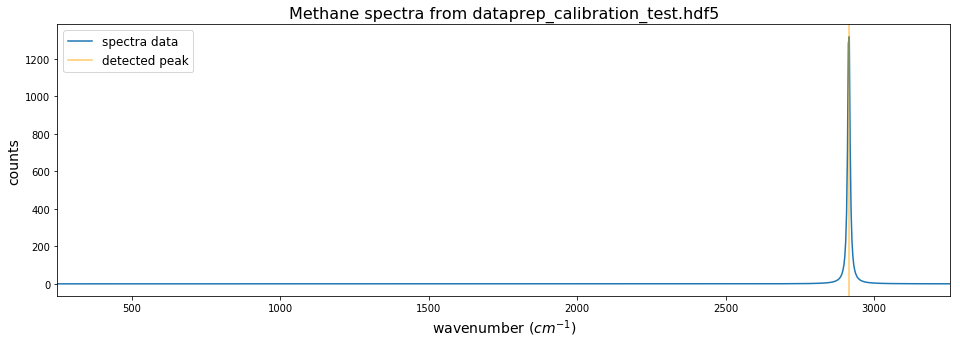

In [69]:
dataprep.plot_fit('dataprep_calibration_test.hdf5', 'Methane')
hdf5_filename = 'dataprep_calibration_test.hdf5'
key = 'Methane'
hdf5 = h5py.File(hdf5_filename, 'r')
# open .hdf5
hdf5 = h5py.File(hdf5_filename, 'r')
# extract spectra data
unknown_x = list(hdf5['{}/wavenumber'.format(key)])
unknown_y = list(hdf5['{}/counts'.format(key)])
# extract fitted peak center values
peak_centers = []
for _,peak in enumerate(list(hdf5[key])[:-2]):
    peak_centers.append(list(hdf5['{}/{}'.format(key, peak)])[2])
unknown_x = np.asarray(unknown_x)
unknown_y = np.asarray(unknown_y)
known_compound_list = list(test_example.keys())
precision = 0.03
unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]
known_peaks = []
association_matrix = []
for i, _ in enumerate(known_compound_list):
    known_peaks.append(spectrafit.compound_report(known_compound_list[i])[0])
    association_matrix.append(compare_unknown_to_known(
        unknown_peaks, known_peaks[i], precision))
unknown_peak_assignments = peak_position_comparisons(
    unknown_peaks,
    known_peaks,
    known_compound_list,
    association_matrix)
plotting_peak_assignments_dev(unknown_x,
                              unknown_y,
                              unknown_peaks,
                              unknown_peak_assignments,
                              hdf5_filename,
                              key)

### Example 1: Wrapper Function - peak_assignment

First, we'll generate the dataset that we will use to explore this functionality. This data will be downloaded from _____

. In order to generate an "unknown spectrum" that we will be attempting to fit, ____________, and feed that in as our unknown dataset. For further explanation of the dataprep or spectrafit packages, refer to the Jupyter notebooks which present examples of their usage, also found in this repo.

In [ ]:
dsetH=H_example['Hydrogen/Peak_1'][2]
print(dsetH)

In [ ]:
list_of_compounds = list(cal_example.keys())
unknown_x = FA_data['x'].values 
unknown_y = FA_data['y'].values
print(unknown_y)

unknown_peaks =list(H_example['Hydrogen/Peak_{}'.format(i)][2])

H_peaks =list(H_example['Hydrogen/Peak_1'][1:3])

print(unknown_peaks)
list_of_compounds = list(H_example.keys())
print(list_of_compounds)
unknown_peak_assignments = list(H_example.keys())
print(unknown_peak_assignments)
#peakidentify.peak_assignment(unknown_x, unknown_y, list_of_compounds)

In [ ]:
# import os
# os.remove('dataprep_calibration_test1.hdf5')

In [ ]:
peakidentify.peak_assignment(unknown_x, unknown_y, list_of_compounds)

# Example 2 - Individual Functions of `peakidentify.py`


In [ ]:
water_peaks = spectrafit.compound_report(compound_1)[0]
co_peaks = spectrafit.compound_report(compound_2)[0]
unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]

In [ ]:
peakidentify.compare_unknown_to_known(unknown_peaks, water_peaks, 0.03)

In [ ]:
peakidentify.compare_unknown_to_known(unknown_peaks, co_peaks, 0.03)

In [ ]:
#Build our test data.
co2_peaks = spectrafit.compound_report(compound_3)[0]
association_matrix = []
known_peaks = [water_peaks, co_peaks, co2_peaks]
association_matrix.append(peakidentify.compare_unknown_to_known(unknown_peaks, water_peaks, 0.03))
association_matrix.append(peakidentify.compare_unknown_to_known(unknown_peaks, co_peaks, 0.03))
association_matrix.append(peakidentify.compare_unknown_to_known(unknown_peaks, co2_peaks, 0.03))
print(association_matrix)

In [ ]:
peakidentify.peak_position_comparisons(unknown_peaks, known_peaks, list_of_compounds, association_matrix)

In [ ]:
peakidentify.peak_position_comparisons(unknown_peaks, [water_peaks], [compound_1], [[1,1,0,0,1]])

In [ ]:
peakidentify.percentage_of_peaks_found(known_peaks, association_matrix, list_of_compounds)

In [ ]:
unknown_peak_assignments = peakidentify.peak_position_comparisons(unknown_peaks, known_peaks, list_of_compounds, association_matrix)
peakidentify.plotting_peak_assignments(unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments)

In [ ]:
# # Original peakidentify
# """This function takes in compounds from a dictionary from shoyu, and, using spectrafit,
# identifies peaks found in both the fed-in known spectra, as well as the unknown spectra
# to be analyzed. From that identification, it then classifies the peaks in the unknown
# spectra based on the fed-in known spectra.
#  """
# import math
# import numpy as np
# import matplotlib.pyplot as plt
# from ramannoodles import spectrafit


# def peak_assignment(unknown_x, unknown_y, known_compound_list,
#                     precision=0.03, plot=True):
#     """This function is a wrapper function from which all classification of peaks occurs."""

#     #Handling errors in inputs.
#     if not isinstance(unknown_x, np.ndarray):
#         raise TypeError("Passed value of `unknown_x` is not a np.ndarray! Instead, it is: "
#                         + str(type(unknown_x)))

#     if not isinstance(unknown_y, np.ndarray):
#         raise TypeError("Passed value of `unknown_y` is not a np.ndarray! Instead, it is: "
#                         + str(type(unknown_y)))

#     if not isinstance(known_compound_list, list):
#         raise TypeError("Passed value of `known_compound_list` is not a list! Instead, it is: "
#                         + str(type(known_compound_list)))

#     #Now we need to check the elements within the known_compound_list to make sure they are correct.
#     for i, _ in enumerate(known_compound_list):
#         if not isinstance(known_compound_list[i], dict):
#             raise TypeError("""Passed value within `known_compound_list` is not a dictionary!
#             Instead, it is: """ + str(type(known_compound_list[i])))

#     if not isinstance(precision, (float, int)):
#         raise TypeError("""Passed value of `precision` is not a float or int!
#         Instead, it is: """ + str(type(precision)))

#     if not isinstance(plot, bool):
#         raise TypeError("""Passed value of `plot` is not a Boolean!
#         Instead, it is: """ + str(type(plot)))

#     #Lets identify the peaks in the unknown spectrum.
#     unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]

#     #OK, next identify all of the peaks present in the known compound set.
#     #For efficiency, we'll also compare them against the unknown in the same for loop.
#     known_compound_peaks = []
#     assignment_matrix = []

#     for i, _ in enumerate(known_compound_list):
#         known_compound_peaks.append(
#             spectrafit.compound_report(known_compound_list[i])[0])
#         print("The peaks that we found for "
#               + str(known_compound_list[i]['title']) + " are: ")
#         print(known_compound_peaks[i])
#         assignment_matrix.append(compare_unknown_to_known(unknown_peaks,
#                                                           known_compound_peaks[i],
#                                                           precision))

#     #Ok, so that generates a full association matrix that contains everything
#     #we need to assign peaks.
#     #Now, let's go through and actually assign text to peaks.
#     unknown_peak_assignments = peak_position_comparisons(unknown_peaks,
#                                                          known_compound_peaks,
#                                                          known_compound_list,
#                                                          assignment_matrix)
#     print(unknown_peak_assignments)

#     if plot:
#         plotting_peak_assignments(unknown_x, unknown_y, unknown_peaks,
#                                   unknown_peak_assignments)

#     percentages = percentage_of_peaks_found(known_compound_peaks,
#                                             assignment_matrix,
#                                             known_compound_list)
#     print(percentages)


# def compare_unknown_to_known(combined_peaks, known_peaks, precision):
#     """This function takes in peak positions for the spectrum to be
#     analyzed and a single known compound and determines if the peaks
#     found in the known compound are present in the unknown spectrum."""

#     #Handling errors in inputs.
#     if not isinstance(combined_peaks, list):
#         raise TypeError("""Passed value of `combined_peaks` is not a list!
#         Instead, it is: """ + str(type(combined_peaks)))

#     if not isinstance(known_peaks, list):
#         raise TypeError("""Passed value of `known_peaks` is not a list!
#         Instead, it is: """ + str(type(known_peaks)))

#     if not isinstance(precision, (float, int)):
#         raise TypeError("""Passed value of `precision` is not a float or int!
#         Instead, it is: """ + str(type(precision)))

#     assignment_matrix = np.zeros(len(combined_peaks))
#     peaks_found = 0
#     for i, _ in enumerate(combined_peaks):
#         for j, _ in enumerate(known_peaks):
#             # instead of If, call peak_1D_score
#             if math.isclose(combined_peaks[i], known_peaks[j],
#                             rel_tol=precision):
#                 # Instead of using a 1, just input the score
#                 # from the score calculator.
#                 # Bigger is better.
#                 # Storing only the second component in the list.
#                 assignment_matrix[i] = 1
#                 peaks_found += 1
#                 continue
#             else:
#                 pass
#         if peaks_found == len(known_peaks):
#             continue
#         else:
#             pass
#     return assignment_matrix


# def peak_position_comparisons(unknown_peaks, known_compound_peaks,
#                               known_compound_list,
#                               association_matrix):
#     """This function takes in an association matrix and turns the numbers
#     given by said matrix into a text label."""

#     #Handling errors in inputs.
#     if not isinstance(unknown_peaks, list):
#         raise TypeError("""Passed value of `unknown_peaks` is not a list!
#         Instead, it is: """ + str(type(unknown_peaks)))

#     if not isinstance(known_compound_peaks, list):
#         raise TypeError("""Passed value of `known_compound_peaks` is not a list!
#         Instead, it is: """ + str(type(known_compound_peaks)))

#     if not isinstance(known_compound_list, list):
#         raise TypeError("""Passed value of `known_compound_list` is not a list!
#         Instead, it is: """ + str(type(known_compound_list)))

#     #Now we need to check the elements within the known_compound_list to make sure they are correct.
#     for i, _ in enumerate(known_compound_list):
#         if not isinstance(known_compound_list[i], dict):
#             raise TypeError("""Passed value within `known_compound_list` is not a dictionary!
#             Instead, it is: """ + str(type(known_compound_list[i])))

#     if not isinstance(association_matrix, list):
#         raise TypeError("""Passed value of `association_matrix` is not a float or int!
#         Instead, it is: """ + str(type(association_matrix)))

#     unknown_peak_assignment = []
#     #Step through the unknown peaks to make an assignment for each unknown peak.

#     for i, _ in enumerate(unknown_peaks):
#         #We might be able to make a small performance improvement if we were to somehow
#         #not search the peaks we already had searched, but that seems to not be trivial.
#         position_assignment = []
#         #We'll need an outer loop that walks through all the different compound positions
#         for j, _ in enumerate(known_compound_peaks):
#             if association_matrix[j][i] == 1:
#                 position_assignment.append(known_compound_list[j]['title'])
#             else:
#                 pass
#         if position_assignment == []:
#             position_assignment.append("Unassigned")
#         unknown_peak_assignment.append(position_assignment)

#     return unknown_peak_assignment


# def percentage_of_peaks_found(known_peaks, association_matrix, list_of_known_compounds):
#     """This function takes in a list of classified peaks, and returns a percentage of
#     how many of the material's peaks are found in the unknown spectrum.
#     This can be used as a metric of confidence."""

#     #Handle bad inputs
#     if not isinstance(known_peaks, list):
#         raise TypeError("""Passed value of `known_peaks` is not a list!
#         Instead, it is: """ + str(type(known_peaks)))

#     if not isinstance(list_of_known_compounds, list):
#         raise TypeError("""Passed value of `list_of_known_compounds` is not a list!
#         Instead, it is: """ + str(type(list_of_known_compounds)))

#     # Now we need to check the elements within the
#     # list_of_known_compounds to make sure they are correct.
#     for i, _ in enumerate(list_of_known_compounds):
#         if not isinstance(list_of_known_compounds[i], dict):
#             raise TypeError("""Passed value within `list_of_known_compounds` is not a dictionary!
#             Instead, it is: """ + str(type(list_of_known_compounds[i])))

#     if not isinstance(association_matrix, list):
#         raise TypeError("""Passed value of `association_matrix` is not a float or int!
#         Instead, it is: """ + str(type(association_matrix)))

#     percentage_dict = {}
#     for i, _ in enumerate(list_of_known_compounds):
#         count_number = sum(association_matrix[i])
#         percentage_dict[list_of_known_compounds[i]
#                         ['title']] = (count_number / len(known_peaks[i])) * 100

#     return percentage_dict


# def plotting_peak_assignments(unknown_x, unknown_y, unknown_peaks, unknown_peak_assignments):
#     """This function plots a set of unknown peaks, and plots the assigned classification given by
#     the functions within peakassignment"""

#     #Handling errors in inputs.
#     if not isinstance(unknown_peaks, list):
#         raise TypeError("""Passed value of `unknown_peaks` is not a list!
#         Instead, it is: """ + str(type(unknown_peaks)))

#     if not isinstance(unknown_x, (list, np.ndarray)):
#         raise TypeError("""Passed value of `unknown_x` is not a list or ndarray!
#         Instead, it is: """ + str(type(unknown_x)))

#     if not isinstance(unknown_y, (list, np.ndarray)):
#         raise TypeError(""" Passed value of `unknown_y` is not a list or ndarray!
#         Instead, it is: """ + str(type(unknown_y)))

#     #Now we need to check the elements within the unknown_peak_assignment
#     #to make sure they are correct.
#     for i, _ in enumerate(unknown_peak_assignments):
#         if not isinstance(unknown_peak_assignments[i], str):
#             raise TypeError("""Passed value within `unknown_peak_assignment` is not a string!
#             Instead, it is: """ + str(type(unknown_peak_assignments[i])))

#     colors = ['b', 'r', 'g', 'c', 'm', 'y', 'b']
#     #fig = plt.figure(figsize=(10, 4), dpi=300)
#     plt.plot(unknown_x, unknown_y, color='black', label='Unknown Spectrum')
#     for i, _ in enumerate(unknown_peaks):
#         plt.axvline(x=unknown_peaks[i], color=colors[i],
#                     label=unknown_peak_assignments[i],
#                     linestyle='--')
#     plt.legend(loc=0, framealpha=1)
#     plt.xlabel('Wavenumber (cm$^{-1}$)', fontsize=12)
#     plt.ylabel('Counts', fontsize=12)
#     plt.ylim(-0.01, 1.5)
#     plt.xlim(300, 3800)
#     plt.show()


# def peak_1d_score(row_i, row_j, scoremax):
#     """
#     Returns scores with respect to the repricoal of the
#     calculated Euclidean distance between peaks
#     #√((x1-x2)^2) in 1D
#     #√((x1-x2)^2 + (y1-y2)^2) in 2D

#     Parameters:
#         row_i (list like):  input list
#         row_j (list like): input list
#         scoremax (float): Euclidean reciprocal score divided by max score; default is 1

#     Returns:
#         scores (list): Euclidean reciprocal scores
#         peaks (tuple): peaks associated with scores
#     """
#     # Handling errors at the input
#     if not isinstance(row_i, (list, np.ndarray)):
#         raise TypeError("""Passed value of `row_i` is not a list or ndarray!
#         Instead, it is: """ + str(type(row_i)))
#     if not isinstance(row_j, (list, np.ndarray)):
#         raise TypeError("""Passed value of `row_j` is not a list or ndarray!
#         Instead, it is: """ + str(type(row_j)))
#     if not isinstance(scoremax, (float, int)):
#         raise TypeError("""Passed value of `scoremax` is not a float or int!
#         Instead, it is: """ + str(type(scoremax)))
#     if scoremax < 0:
#         raise ValueError("""Passed value of `scoremax` is not within bounds!""")

#     # Initializing the variables
#     scores = []
#     peaks = []

#     for i, _ in enumerate(row_i):
#         for j, _ in enumerate(row_j):
#             # Calculating distances between peaks
#             distance = np.where((row_i[i] - row_j[j] > 50), np.nan,
#                                 math.sqrt(sum([math.pow(row_i[i] - row_j[j], 2)])))
#             # Score for peaks less than 50 units apart
#             if 1 / (distance + 1) > .02:
#                 # Dividing over the given max score
#                 scores.append(((1 / (distance + 1)) / scoremax))
#                 # Appends a tuple of the compared peaks
#                 peaks.append((row_i[i], row_j[j]))
#             else:
#                 pass
#     return scores, peaks


# def score_max(row_i, row_j, k):
#     """
#     Returns list of scores sorted with respect to the peaks
#     related to its output max score

#     Parameters:
#         row_i (list like):  input list
#         row_j (list like): input list
#         k (int): input integer used to sort the scores / kth highest score

#     Returns:
#         maxscores (list): Euclidean reciprocal score divided by max score
#         maxpeaks (tuple): peaks associated with max scores
#     """

#     # Handling errors at the input
#     if not isinstance(row_i, (list, np.ndarray)):
#         raise TypeError("""Passed value of `row_i` is not a list or ndarray!
#         Instead, it is: """ + str(type(row_i)))
#     if not isinstance(row_j, (list, np.ndarray)):
#         raise TypeError("""Passed value of `row_j` is not a list or ndarray!
#         Instead, it is: """ + str(type(row_j)))
#     if not isinstance(k, int):
#         raise TypeError("""Passed value of `k` is not an int!
#         Instead, it is: """ + str(type(k)))
#     if k < 0:
#         raise ValueError("""Passed value of `k` is not within bounds!""")
#     try:
#         scoremax = sorted(set(peak_1d_score(row_i, row_j, 1)[0][:]))[-k]
#         maxscores, maxpeaks = peak_1d_score(row_i, row_j, scoremax)

#     except Exception as e:
#         print("""Function did not receive a scoremax variable. The variable
#         scoremax has been reset back to 1.""")

#         maxscores, maxpeaks = peak_1d_score(row_i, row_j, scoremax=1)

#     return maxscores, maxpeaks


# def score_sort(row_i, row_j, k):
#     """
#     Returns list of scores sorted

#     Parameters:
#         list_input (list like):  input list
#         row (list like): input list
#         k (int): input integer used to sort the scores / kth highest score

#     Returns:
#         sortedscores (list): sorted Euclidean distances
#     """
#     # Handling errors at the input
#     if not isinstance(row_i, (list, np.ndarray)):
#         raise TypeError("""Passed value of `row_i` is not a list or ndarray!
#         Instead, it is: """ + str(type(row_i)))
#     if not isinstance(row_j, (list, np.ndarray)):
#         raise TypeError("""Passed value of `row_j` is not a list or ndarray!
#         Instead, it is: """ + str(type(row_j)))
#     if not isinstance(k, int):
#         raise TypeError("""Passed value of `k` is not an int!
#         Instead, it is: """ + str(type(k)))
#     if k < 0:
#         raise ValueError("""Passed value of `k` is not within bounds!""")

#     sortedscores = []
#     sortedscores.append(score_max(row_i, row_j, k))
#     sortedscores.sort()

#     return sortedscores


In [41]:
# import os
# os.remove('dataprep_calibration.hdf5')
# os.remove('dataprep_experiment.hdf5')

In [ ]:
# #Original test_peakidentify
# """
# Module used to unit test the functionality and outputs of the peakidentify.py module
# """
# # IMPORTING MODULES
# import pickle
# import numpy as np
# from ramannoodles import peakidentify
# from ramannoodles import shoyu
# from ramannoodles import spectrafit

# def test_peak_assignment():
#     """This function tests the operation of the peak_assignment function in peakidentify.py"""
#     #First, generate a testing dataset.
#     shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
#     compound_1 = shoyu_data_dict['WATER']
#     compound_2 = shoyu_data_dict['CARBON MONOXIDE']
#     compound_3 = shoyu_data_dict['CARBON DIOXIDE']
#     unknown_x, unknown_y = shoyu.combine_spectra(compound_1, compound_2, plot=False)
#     unknown_x = np.asarray(unknown_x)
#     unknown_y = np.asarray(unknown_y)
#     known_compound_list = [compound_1, compound_2, compound_3]
#     precision = 0.03

#     #Various try statements to make sure that bad inputs are handled correctly.
#     try:
#         peakidentify.peak_assignment(1, unknown_y, known_compound_list, precision, False)
#     except TypeError:
#         print("An invalid unknown_x was passed to the function, and it was"
#               " handled well with a TypeError.")

#     try:
#         peakidentify.peak_assignment(unknown_x, 2, known_compound_list, precision, False)
#     except TypeError:
#         print("An invalid unknown_y was passed to the function, and it was "
#               "handled well with a TypeError.")

#     try:
#         peakidentify.peak_assignment(unknown_x, unknown_y, 'string', precision, False)
#     except TypeError:
#         print("An invalid known_compound_list was passed to the function, "
#               "and it was handled well with a TypeError.")

#     try:
#         peakidentify.peak_assignment(unknown_x, unknown_y, [1, 3, 6], precision, False)
#     except TypeError:
#         print("An invalid element inside known_compound_list was passed to "
#               "the function, and it was handled well with a TypeError.")

#     try:
#         peakidentify.peak_assignment(unknown_x, unknown_y, known_compound_list, 'precision', False)
#     except TypeError:
#         print("An invalid precision value was passed to the function, and "
#               "it was handled well with a TypeError.")

#     try:
#         peakidentify.peak_assignment(1, unknown_y, known_compound_list, precision, 'False')
#     except TypeError:
#         print("An invalid plot value was passed to the function, and it "
#               "was handled well with a TypeError.")

# def test_compare_unknown_to_known():
#     """This function tests the operation of the compare_unknown_to_known
#     function in peakidentify.py"""
#     #Build our test dataset.
#     shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
#     compound_1 = shoyu_data_dict['WATER']
#     compound_2 = shoyu_data_dict['CARBON MONOXIDE']
#     compound_3 = shoyu_data_dict['CARBON DIOXIDE']
#     unknown_x, unknown_y = shoyu.combine_spectra(compound_1, compound_2, plot=False)
#     unknown_x = np.asarray(unknown_x)
#     unknown_y = np.asarray(unknown_y)
#     known_compound_list = [compound_1, compound_2, compound_3]
#     precision = 0.03
#     known_peaks = []
#     for i, _ in enumerate(known_compound_list):
#         known_peaks.append(spectrafit.compound_report(known_compound_list[i])[0])
#     unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]

#     try:
#         peakidentify.compare_unknown_to_known(1, known_peaks[0], precision)
#     except TypeError:
#         print("An invalid unknown_peaks value was passed to the function, "
#               "and was handled correctly.")

#     try:
#         peakidentify.compare_unknown_to_known(unknown_peaks, 'known_peaks', precision)
#     except TypeError:
#         print("An invalid known_peaks value was passed to the function, "
#               "and was handled correctly.")

#     try:
#         peakidentify.compare_unknown_to_known(unknown_peaks, known_peaks[0], 'precision')
#     except TypeError:
#         print("An invalid precision value was passed to the function, and "
#               "was handled correctly.")

#     #After testing for resilience to unexpected inputs, now ensure outputs are performing correctly

#     #First, make sure function is returning the list.
#     assert isinstance(peakidentify.compare_unknown_to_known(
#         unknown_peaks, known_peaks[0], precision), np.ndarray), (""
#                                                                  "Function is not returning list")

#     #Compare one set of peaks to itself. The full association matrix should have all values = 1.
#     self_comp = np.mean(peakidentify.compare_unknown_to_known(known_peaks[0],
#                                                               known_peaks[0], precision))
#     assert self_comp == 1, ("Peak Assignment Error. Comparison of compound "
#                             "against itself should find all peaks.")

#     dif_comp = np.mean(peakidentify.compare_unknown_to_known([1, 3, 6],
#                                                              [1000, 2000, 5000], precision))
#     assert dif_comp == 0, ("Peak Assignment Error. Passed values should "
#                            "have no matching assignments.")

# def test_peak_position_comparisons():
#     """This function tests the operation of the peak_position_comparisons
#     function in peakidentify. Said function returns a list of strings that
#     contain text assignments of each peak in the unknown spectrum."""

#     #First, generate good data.
#     shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
#     compound_1 = shoyu_data_dict['WATER']
#     compound_2 = shoyu_data_dict['CARBON MONOXIDE']
#     compound_3 = shoyu_data_dict['CARBON DIOXIDE']
#     unknown_x, unknown_y = shoyu.combine_spectra(compound_1, compound_2, plot=False)
#     unknown_x = np.asarray(unknown_x)
#     unknown_y = np.asarray(unknown_y)
#     known_compound_list = [compound_1, compound_2, compound_3]
#     unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]
#     known_peaks = []
#     association_matrix = []
#     for i, _ in enumerate(known_compound_list):
#         known_peaks.append(spectrafit.compound_report(known_compound_list[i])[0])
#         association_matrix.append(peakidentify.compare_unknown_to_known(
#             unknown_peaks, known_peaks[i], 0.03))

#     #Then, test error handling of bad inputs for the function.
#     try:
#         peakidentify.peak_position_comparisons(1, known_peaks,
#                                                known_compound_list,
#                                                association_matrix)
#     except TypeError:
#         print("An invalid unknown_peaks value was passed to the function, "
#               "and was handled correctly.")

#     try:
#         peakidentify.peak_position_comparisons(unknown_peaks,
#                                                'known_peaks',
#                                                known_compound_list,
#                                                association_matrix)
#     except TypeError:
#         print("An invalid known_peaks value was passed to the function, "
#               "and was handled correctly.")

#     try:
#         peakidentify.peak_position_comparisons(unknown_peaks,
#                                                known_peaks,
#                                                'known_compound_list',
#                                                association_matrix)
#     except TypeError:
#         print("An invalid known_compound_list value was passed to the function,"
#               "and was handled correctly.")

#     try:
#         peakidentify.peak_position_comparisons(unknown_peaks,
#                                                known_peaks,
#                                                known_compound_list,
#                                                'association_matrix')
#     except TypeError:
#         print("An invalid association_matrix value was passed to the function,"
#               "and was handled correctly.")

#     #Check to make sure the function is returning a list.
#     assert isinstance(peakidentify.peak_position_comparisons(
#         unknown_peaks, known_peaks, known_compound_list,
#         association_matrix), list), "The function is not returning a list."

#     #Test a call that says that no peaks have associations
#     association_matrix_0 = []
#     association_matrix_0.append(peakidentify.compare_unknown_to_known(known_peaks[0],
#                                                                       known_peaks[1],
#                                                                       0.03))
#     zero_output = peakidentify.peak_position_comparisons(known_peaks[0],
#                                                          [known_peaks[1]],
#                                                          [compound_1],
#                                                          association_matrix_0)[0]
#     assert zero_output[0] == 'Unassigned', """The function is not properly
#     handling unassigned peaks."""

#     #Test the function to make sure that it has the right functionality
#     association_matrix = []
#     #Generate a matrix with all associations equal to 1
#     association_matrix.append(peakidentify.compare_unknown_to_known(known_peaks[0],
#                                                                     known_peaks[0],
#                                                                     0.03))
#     #change the middle index to 0
#     association_matrix[0][1] = 0
#     test_peak_labels = peakidentify.peak_position_comparisons(known_peaks[0],
#                                                               [known_peaks[0]],
#                                                               [compound_1],
#                                                               association_matrix)
#     assert test_peak_labels[0][0] == 'WATER', """The function is
#     not correctly assigning peaks when association matrix = 1"""
#     assert test_peak_labels[1][0] == 'Unassigned', """The function is
#     not correctly handling a lack of peak assignments"""
#     assert test_peak_labels[2][0] == 'WATER', """The funciton is
#     not correctly assigning peaks when association matrix = 1"""

# def test_percentage_of_peaks_found():
#     """This function tests the operation of the
#     percentage_of_peaks_found function in peakidentify.py"""
#     #First, generate good data.
#     shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
#     compound_1 = shoyu_data_dict['WATER']
#     compound_2 = shoyu_data_dict['CARBON MONOXIDE']
#     compound_3 = shoyu_data_dict['CARBON DIOXIDE']
#     unknown_x, unknown_y = shoyu.combine_spectra(compound_1, compound_2, plot=False)
#     unknown_x = np.asarray(unknown_x)
#     unknown_y = np.asarray(unknown_y)
#     known_compound_list = [compound_1, compound_2, compound_3]
#     unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]
#     known_peaks = []
#     association_matrix = []
#     for i, _ in enumerate(known_compound_list):
#         known_peaks.append(spectrafit.compound_report(known_compound_list[i])[0])
#         association_matrix.append(peakidentify.compare_unknown_to_known(unknown_peaks,
#                                                                         known_peaks[i],
#                                                                         0.03))

#     #Test for input error handling.
#     try:
#         peakidentify.percentage_of_peaks_found(1, association_matrix, known_compound_list)
#     except TypeError:
#         print("""The function correctly handled the error when an int
#         was input instead of the known_peaks list""")

#     try:
#         peakidentify.percentage_of_peaks_found(known_peaks, 1, known_compound_list)
#     except TypeError:
#         print("""The function correctly handled the error when an int
#         was input instead of the association matrix""")

#     try:
#         peakidentify.percentage_of_peaks_found(known_peaks,
#                                                association_matrix,
#                                                'known_compound_list')
#     except TypeError:
#         print("""The function correctly handled the error when a string
#         was input instead of the known_compound_list""")

#     try:
#         peakidentify.percentage_of_peaks_found(known_peaks,
#                                                association_matrix,
#                                                [compound_1,
#                                                 compound_2,
#                                                 'compound_3'])
#     except TypeError:
#         print("""The function correctly handled the case where the compound
#         list contains something that is not a compound""")

#     #Test to make sure function returns a dictionary.
#     assert isinstance(peakidentify.percentage_of_peaks_found(
#         known_peaks,
#         association_matrix,
#         known_compound_list), dict), """The function is not
#         returning a dictionary."""

#     #Test for function output.
#     water_peaks = spectrafit.compound_report(compound_1)[0]
#     water_dict_0 = peakidentify.percentage_of_peaks_found([water_peaks],
#                                                           [[0, 0, 0]],
#                                                           [compound_1])
#     assert water_dict_0['WATER'] == 0, """The function is not correctly
#     calculating percentages when no peaks are found"""

#     water_dict_1 = peakidentify.percentage_of_peaks_found([water_peaks],
#                                                           [[1, 1, 1]],
#                                                           [compound_1])
#     assert water_dict_1['WATER'] == 100, """The function is not correctly
#     calculating percentages when all peaks are found"""


# def test_plotting_peak_assignments():
#     """This function tests the operation of the peak_assignment
#     function in peakidentify.py"""
#     #First, generate good data.
#     shoyu_data_dict = pickle.load(open('raman_spectra/shoyu_data_dict.p', 'rb'))
#     compound_1 = shoyu_data_dict['WATER']
#     compound_2 = shoyu_data_dict['CARBON MONOXIDE']
#     compound_3 = shoyu_data_dict['CARBON DIOXIDE']
#     unknown_x, unknown_y = shoyu.combine_spectra(compound_1, compound_2, plot=False)
#     unknown_x = np.asarray(unknown_x)
#     unknown_y = np.asarray(unknown_y)
#     known_compound_list = [compound_1, compound_2, compound_3]
#     precision = 0.03
#     unknown_peaks = spectrafit.data_report(unknown_x, unknown_y)[0]
#     known_peaks = []
#     association_matrix = []
#     for i, _ in enumerate(known_compound_list):
#         known_peaks.append(spectrafit.compound_report(known_compound_list[i])[0])
#         association_matrix.append(peakidentify.compare_unknown_to_known(
#             unknown_peaks, known_peaks[i], precision))
#     unknown_peak_assignments = peakidentify.peak_position_comparisons(
#         unknown_peaks,
#         known_peaks,
#         known_compound_list,
#         association_matrix)

#     #Test for input error handling.
#     try:
#         peakidentify.plotting_peak_assignments(1,
#                                                unknown_y,
#                                                unknown_peaks,
#                                                unknown_peak_assignments)
#     except TypeError:
#         print("""The function correctly handled the error
#         when an int was input instead of the unknown_x list""")

#     try:
#         peakidentify.plotting_peak_assignments(unknown_x,
#                                                3,
#                                                unknown_peaks,
#                                                unknown_peak_assignments)
#     except TypeError:
#         print("""The function correctly handled the error when an int
#         was input instead of the unknown_y list""")

#     try:
#         peakidentify.plotting_peak_assignments(unknown_x,
#                                                unknown_y,
#                                                'unknown_peaks',
#                                                unknown_peak_assignments)
#     except TypeError:
#         print("""The function correctly handled the error when a string
#         was input instead of the unknown_peaks list""")

#     try:
#         peakidentify.plotting_peak_assignments(unknown_x,
#                                                unknown_y,
#                                                unknown_peaks,
#                                                3)
#     except TypeError:
#         print("""The function correctly handled the error when an int
#         was input instead of the unknown_peak_assignments""")

#     try:
#         peakidentify.plotting_peak_assignments(unknown_x,
#                                                unknown_y,
#                                                unknown_peaks,
#                                                ['WATER', 23, 'CO'])
#     except TypeError:
#         print("""The function correctly handled the case when an int
#         was passed in the unknown_peak_assignment list""")

# def test_peak_1d_score():
#     """Evaluates the functionality of the peak_1D_score function"""
#     # Initialize the test arguments
#     row_i = [0, 1]
#     row_j = [2, 1]
#     rowcat = row_i + row_j
#     arraya = np.array([[0, 1], [2, 1], [0, 3]])
#     arraycat = np.concatenate((arraya[0], arraya[2]))

#     # Run Bad Function for lists
#     try:
#         testscore = peakidentify.peak_1d_score(row_i, row_j, -1)
#     except ValueError:
#         print("An invalid scoremax value was passed to the function, "
#               "and was handled correctly.")

#     # Run Bad Function for arrays
#     try:
#         arrayscore = peakidentify.peak_1d_score(arraya[0], arraya[2], -1)

#     except ValueError:
#         print("An invalid scoremax value was passed to the function, "
#               "and was handled correctly.")

#     # Running a good example
#     testscore = peakidentify.peak_1d_score(row_i, row_j, 1)
#     arrayscore = peakidentify.peak_1d_score(arraya[0], arraya[2], 1)

#     # make assertions
#     assert len(row_i) == len(row_j), 'Input lengths do not match'
#     assert len(arrayscore[0][:]) == len(arraycat), """Output list length
#     different than concatenated lists length"""
#     for i in range(len(rowcat)):
#         assert 0 <= testscore[0][i] <= 1, 'Output value outside acceptable range'
#         assert 0 <= arrayscore[0][i] <= 1, 'Output value outside acceptable range'


# def test_score_max():
#     """Evaluates the functionality of the score_max function"""
#     # Initialize the test arguments
#     k = 2
#     row_i = [0, 3]
#     row_j = [2, 1]
#     rowcat = row_i + row_j
#     arraya = np.array([[0, 1], [2, 1], [0, 3]])

#     arraycat = np.concatenate((arraya[0], arraya[1]))

#     # Run Function for lists
#     try:

#         maxscores = peakidentify.score_max(row_i, row_j, -1)

#     except ValueError:

#         print("An invalid k value was passed to the function, "
#               "and was handled correctly.")

#      # Run Function for arrays
#     try:

#         arrmaxscores = peakidentify.score_max(arraya[0], arraya[1], -1)

#     except ValueError:

#         print("An invalid k value was passed to the function, "
#               "and was handled correctly.")

#     # Run good examples
#     maxscores = peakidentify.score_max(row_i, row_j, k)
#     arrmaxscores = peakidentify.score_max(arraya[0], arraya[1], k)

#     # make assertions
#     assert len(arrmaxscores[0]) == len(arraycat), """Output list length different
#     than concatenated lists length"""
#     for i, _ in enumerate(rowcat):
#         assert 0 <= arrmaxscores[0][i] <= 2, 'Output value outside acceptable range'
#         assert 0 <= maxscores[0][i] <= 2, 'Output value outside acceptable range'
#     for i, _ in enumerate(maxscores, 1):
#         assert maxscores[0][i-1] >= maxscores[0][-1], 'Output values are less than the max value'


# def test_score_sort():
#     """Evaluates the functionality of the score_sort function"""
#     # Initialize the test arguments
#     row_i = [0, 1]
#     row_j = [2, 1]
#     rowcat = row_i + row_j
#     arraya = np.array([[0, 1], [2, 1], [0, 3]])
#     k = 2
#     arraycat = np.concatenate((arraya[0], arraya[1]))
#     # Run Previous Function to get max score normalization
#     maxscores = peakidentify.score_max(row_i, row_j, k)

#     # Run Function for lists

#     try:
#         sortedscores = peakidentify.score_sort(row_i, row_j, max(maxscores[0]))

#     except TypeError:

#         print("An invalid maxscores from score_max was passed to the function, "
#               "and was handled correctly.")

#     # Run Function for arrays

#     try:

#         arrsortedscores = peakidentify.score_sort(arraya[0], arraya[1], max(maxscores[0]))

#     except TypeError:

#         print("An invalid maxscores from score_max was passed to the function, "
#               "and was handled correctly.")

#     # Run good examples
#     sortedscores = peakidentify.score_sort(row_i, row_j, int(max(maxscores[0])))
#     arrsortedscores = peakidentify.score_sort(arraya[0],
#                                               arraya[1],
#                                               int(max(maxscores[0])))
#     # make assertions
#     assert len(arraycat) == len(arrsortedscores[0][0]), """Output list length
#     different than concatenated lists length"""
#     assert len(rowcat) == len(sortedscores[0][0]), """Output list length
#     different than concatenated lists length"""
#     for i, _ in enumerate(sortedscores):
#         assert sortedscores[0][0][i] <= sortedscores[0][0][i+1], """Output values
#         is sorted from smallest to largest"""
#         assert arrsortedscores[0][0][i] <= arrsortedscores[0][0][i+1], """Output
#         values is sorted from smallest to largest"""
